<a href="https://colab.research.google.com/github/yohannes242005/thesis/blob/main/Model6_deep_learning_SoftMax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_SIZE = [128, 128]

In [ ]:
path = '/content/drive/My Drive/D:/Crop pepper/Training'

In [ ]:
train_path = '/content/drive/My Drive/Crop2 dataset  pepper/Training'
valid_path = '/content/drive/My Drive/Crop2 dataset  pepper/Validation'

In [ ]:
import tensorflow as tf
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
import zipfile
%matplotlib inline

In [ ]:
import os
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
import os
import glob
import cv2

In [ ]:
SIZE = 128
train_image = []
train_label = []
for dir_path in glob.glob("/content/drive/My Drive/Crop2 dataset  pepper/Training/*"):
    label = dir_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(SIZE,SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        #img = color_mask_segmentation(img)
        train_image.append(img)
        train_label.append(label)
train_image = np.array(train_image)
train_label = np.array(train_label)

val_image = []
val_label = []
for dir_path_v in glob.glob("/content/drive/My Drive/Crop2 dataset  pepper/Validation/*"):
    label_v = dir_path_v.split("\\")[-1]
    #print(label_v)
    for img_path_v in glob.glob(os.path.join(dir_path_v,"*.jpg")):
        #print(img_path_v)
        img = cv2.imread(img_path_v,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(SIZE,SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        #img = color_mask_segmentation(img)
        val_image.append(img)
        val_label.append(label_v)
val_image = np.array(val_image)
val_label = np.array(val_label)

/content/drive/My Drive/Crop2 dataset  pepper/Training/Crop Pepper Leaf blight
/content/drive/My Drive/Crop2 dataset  pepper/Training/Crop Pepper Leaf blight/B64.jpg
/content/drive/My Drive/Crop2 dataset  pepper/Training/Crop Pepper Leaf blight/B65.jpg
/content/drive/My Drive/Crop2 dataset  pepper/Training/Crop Pepper Leaf blight/B66.jpg
/content/drive/My Drive/Crop2 dataset  pepper/Training/Crop Pepper Leaf blight/B67.jpg
/content/drive/My Drive/Crop2 dataset  pepper/Training/Crop Pepper Leaf blight/B68.jpg
/content/drive/My Drive/Crop2 dataset  pepper/Training/Crop Pepper Leaf blight/B69.jpg
/content/drive/My Drive/Crop2 dataset  pepper/Training/Crop Pepper Leaf blight/B70.jpg
/content/drive/My Drive/Crop2 dataset  pepper/Training/Crop Pepper Leaf blight/B71.jpg
/content/drive/My Drive/Crop2 dataset  pepper/Training/Crop Pepper Leaf blight/B72.jpg
/content/drive/My Drive/Crop2 dataset  pepper/Training/Crop Pepper Leaf blight/B73.jpg
/content/drive/My Drive/Crop2 dataset  pepper/Train

In [ ]:
from sklearn import preprocessing
from keras.utils.all_utils import to_categorical
le = preprocessing.LabelEncoder()
le.fit(train_label)
train_labe_encoded = le.transform(train_label)
le.fit(val_label)
val_label_encoded = le.transform(val_label)
x_train,y_train,x_test,y_test = train_image,train_labe_encoded,val_image,val_label_encoded
x_train,x_test = x_train/255.0,x_test/255.0
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
kernel_initializer = 'he_uniform' #good for relu activation func

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape = (128,128,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.15))

model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(4,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)      

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model
r = model.fit(x_train,y_train_one_hot,epochs=100,validation_data=(x_test,y_test_one_hot))

Epoch 1/100
57/57 [==============================] - 71s 1s/step - loss: 0.8344 - accuracy: 0.7104 - val_loss: 0.3359 - val_accuracy: 0.8849
Epoch 2/100
57/57 [==============================] - 63s 1s/step - loss: 0.2010 - accuracy: 0.9344 - val_loss: 0.1924 - val_accuracy: 0.9456
Epoch 3/100
57/57 [==============================] - 63s 1s/step - loss: 0.1520 - accuracy: 0.9531 - val_loss: 0.2452 - val_accuracy: 0.9163
Epoch 4/100
57/57 [==============================] - 63s 1s/step - loss: 0.0942 - accuracy: 0.9675 - val_loss: 0.2626 - val_accuracy: 0.9163
Epoch 5/100
57/57 [==============================] - 63s 1s/step - loss: 0.0882 - accuracy: 0.9708 - val_loss: 0.2366 - val_accuracy: 0.9059
Epoch 6/100
57/57 [==============================] - 63s 1s/step - loss: 0.0666 - accuracy: 0.9779 - val_loss: 0.1688 - val_accuracy: 0.9623
Epoch 7/100
57/57 [==============================] - 62s 1s/step - loss: 0.0366 - accuracy: 0.9868 - val_loss: 0.1067 - val_accuracy: 0.9707
Epoch 8/100
5

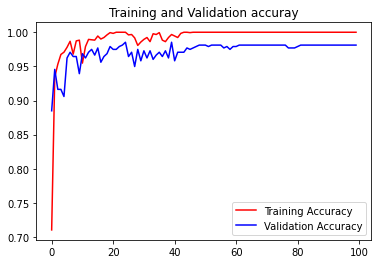

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = r.history['accuracy']

val_acc = r.history['val_accuracy']

#loss = r.history['loss']

#val_loss = r.history['val_loss']

epochs = range(len(acc))

 

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

#plt.plot(epochs, loss,'', label = 'loss')

#plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()

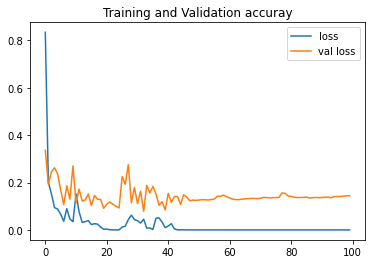

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = r.history['accuracy']

#val_acc = r.history['val_accuracy']

loss = r.history['loss']

val_loss = r.history['val_loss']

epochs = range(len(acc))

 

#plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

#plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

plt.plot(epochs, loss,'', label = 'loss')

plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

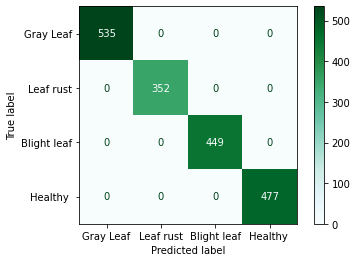

In [ ]:
pred=model.predict(x_train)

round_pred = np.argmax(pred,axis=-1)

#print(round_pred)

cm = confusion_matrix(y_train, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Gray Leaf','Leaf rust','Blight leaf','Healthy '])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr

plt.show()